# Método Colônia de Formigas aplicado ao Problema do Caixeiro Viajante

O método colônia de formigas (Ant Colony Optimization - ACO) é uma meta-heurística inspirada no comportamento de forrageamento das formigas. Esta técnica é amplamente utilizada para resolver problemas de otimização combinatória, como o problema do caixeiro viajante (Travelling Salesman Problem - TSP).

A seguir, apresentamos um passo a passo da aplicação do ACO ao TSP.

# INICIO DO ALGORITMO:

## Passo 1: Hyperparâmetros

Inicialmente, são definidas as seguintes variáveis:

- $\alpha$: parâmetro que controla a influência do feromônio.
- $\beta$: parâmetro que controla a influência da visibilidade (heurística).
- $\rho$: taxa de evaporação do feromônio.
- $Q$: quantidade de feromônio depositada por uma formiga.
- $m$: número de formigas.
- $n$: número de cidades.
- $t$: épocas
- $R_\text{taxa}$: taxa de aumento do raio

Os vetores e matrizes necessários são inicializados:

- Matriz de feromônio $\tau_{ij}$: inicializada com um pequeno valor positivo.
- Matriz de visibilidade $\eta_{ij} = \frac{1}{d_{ij}}$, onde $d_{ij}$ é a distância entre as cidades $i$ e $j$.

\begin{equation}
\tau_{ij} = \tau_0, \quad \eta_{ij} = \frac{1}{d_{ij}}
\end{equation}


## Passo 2: Aplicação do raio de busca variável

Restrição para evitar que o algoritmo escolha pontos excessivamente afastados.

Se não há nenhum ponto de visita dentro do raio inicial:
\begin{equation}
    R_\text{atual} \leftarrow R_\text{atual} \times R_\text{taxa}.
\end{equation}
Continuar até que tenha pelo menos um ponto dentro do raio.

## Passo 3: Construção das Soluções

Cada formiga constrói uma solução (um tour) de forma probabilística. A probabilidade de uma formiga se mover da cidade $i$ para a cidade $j$ é dada por:

\begin{equation}
P_{ij} = \frac{[\tau_{ij}]^\alpha [\eta_{ij}]^\beta}{\sum_{k \in \text{não visitadas}} [\tau_{ik}]^\alpha [\eta_{ik}]^\beta}
\end{equation}

Após todas as formigas completarem seus tours, a quantidade de feromônio nos caminhos percorridos é atualizada. O feromônio evapora ao longo do tempo e é depositado pelas formigas nos caminhos que percorreram. A atualização é feita da seguinte forma:


## Passo 4: Atualização do Feromônio
1. **Evaporação do Feromônio:**

\begin{equation}
\tau_{ij} \leftarrow (1 - \rho) \tau_{ij}
\end{equation}

2. **Deposição do Feromônio:**

\begin{equation}
\tau_{ij} \leftarrow \tau_{ij} + \sum_{\text{todas asn}}
\end{equation}

\begin{equation}
\Delta \tau_{ij}^k = \begin{cases}
\frac{Q}{L_k} & \text{se a formiga } k \text{ percorrer a aresta } (i,j) \\
0 & \text{caso contrário}
\end{cases}
\end{equation}

## 5) Repita os passos 2 até 4 por $t$ épocas

# FIM DO ALGORITMO:


In [ ]:

import locale
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
### from prettytable import PrettyTable
from itertools import product
from math import sqrt
import random
import folium
from pyproj import Proj
### import gurobipy as gp
### from gurobipy import GRB
# importing googlemaps module
#import googlemaps
import pandas as pd
import geopy.distance as gd
import sys
import time
import os

# Chamando o arquivo .py com as funções implementadas
import Modulo

### 1) Carregamento dos bancos de dados:

In [ ]:
# Carregamento dos dados dos postos de saúde já tratados:
cab = ['Índice','Região','Endereço','CoordenadaXY','X','Y']
postos_data = pd.read_csv('../Banco_de_dados/postos_data.csv', sep=',', skiprows=1, names = cab)
postos_data.head()

,Índice,Região,Endereço,CoordenadaXY,X,Y
0,0,Centro,Rua Coronel José Monteiro 407 Centro,-23.181409264128344 -45.88413629003892,-45.884136,-23.181409
1,1,Centro,Avenida Anchieta 1069 Jardim Nova América,-23.19300408207269 -45.90407824956441,-45.904078,-23.193004
2,2,Centro,Rua Martins Pereira 263 Jardim Paulista,-23.190159425525938 -45.87033204771088,-45.870332,-23.190159
3,3,Centro,Rua São Pedro 55 Vila Maria,-23.17685304237057 -45.878886747711434,-45.878887,-23.176853
4,4,Leste,Rua Júlia Cursino 161 Americano,-23.179259398036233 -45.81191067654758,-45.811911,-23.179259


In [ ]:
postos_data['Região'].value_counts()

Região
Leste      10
Sul         9
Norte       5
Centro      4
Sudeste     4
Oeste       2
Name: count, dtype: int64

In [ ]:
# Carregamento dos dados do público alvo já tratados:
cab = ['Índice', 'id', 'oms_id', 'Nome', 'loteamento', 'Região', 'X', 'Y']
publico_data = pd.read_csv('../Banco_de_dados/publico_data_clean.csv', sep=',', skiprows=1, names = cab)
publico_data.head()

#### Atenção! usar o "publico_data_clean.csv"

,Índice,id,oms_id,Nome,loteamento,Região,X,Y
0,0,4641,136620525.0,Antenor Salles Villela (Estrada Principal),Aguas de Canindu,Norte,-45.899820,-23.133007
1,1,7801,326258616.0,Sem nome,Alto da Vila Paiva,Norte,-45.911497,-23.142434
2,2,4530,135885227.0,Jose de Alencar Araujo,Alto do Caete,Norte,-45.921024,-23.146000
3,3,4558,135888765.0,JosÃ© Pereira Filho,Altos da Ponte,Norte,-45.900061,-23.153031
4,4,4559,135888762.0,Anselmo Carnevalli,Altos da Ponte,Norte,-45.901770,-23.152832


In [ ]:
publico_data['Região'].value_counts()

Região
Sul        1720
Leste      1408
Sudeste     796
Centro      698
Norte       517
Oeste       418
Name: count, dtype: int64

### 2) Mapas São José:

#### 2.1) Sub-região que será usada no Otimizador:

In [ ]:
# Usando a função mapa_regiao para plot do mapa personalizado:

Modulo.Region_map(postos_data,
                  publico_data,
                  postos_data.X,
                  postos_data.Y,
                  publico_data.X,
                  publico_data.Y,
                  regiao='Sudeste',
                  cor='red')

### 3) Material e versões do Otimizador:

Links:

https://induraj2020.medium.com/implementation-of-ant-colony-optimization-using-python-solve-traveling-salesman-problem-9c14d3114475

http://www.lac.inpe.br/~lorena/cap/Aula_C03.pdf

https://www.ime.unicamp.br/~chico/mt852/formigas.pdf

#### 3.1) Últimas versõs do Otimizador:

##### Versão 2.0:

###### Adaptação para o cálculo de distância usando o "gd.geodesic";

###### Adaptação da saída da função (gráfico 3D p/ índices com o melhor caminho).

##### Versão 2.5:

###### Adição da parada do algoritmo utilizando o cálculo de tempo do agente;

###### Imposição do ponto inicial sendo o posto de saúde;

###### Adição do condicional para cálculo do tempo total;

###### Adição do condicional para o fator de exploração aleatória, a fim de evitar mínimos locais. [desativado devido inconsistências];

##### Versão 3.0:

###### Adição da variável "radius". Permite que a busca por pontos esteja dentro de uma vizinhança (raio), evitando escolha de pontos longínquos, que poderiam ser abordados por outro posto;

###### Adição do "incremento do raio", para a solução do prblema de não existir pontos dentro do raio escolhido inicialmente.

##### Versão 3.1:

###### Atualização de bug: o raio da versão 3.0 não estava atualizando. Nova abordagem de condicional na variável "probabilities"

##### Versão 3.2:

###### União das funções "ant_colony_optimization_3_1" e "best_way"

###### Atualização das saídas da nova função

##### Versão 3.3:

###### Adição do relatório .txt

###### Retirada informações desnecessárias para otimizar a execução do script

###### Loop para geração de sequência de índices do Otimizador;

##### Versão 4.0:

###### Super loop para gerar as sequências de coordenadas dos agentes;

###### Super loop para geração dos .html com os caminhos;

###### Adaptação do best_way para a variável "seq_points";



### 4) Super loop para geração dos caminhos:

#### 4.1) Hiperprâmetros:

In [ ]:
# Aqui pode-se alterar os inputs que serão usados na função "ant_colony_optimization_4"
n_ants = 4
n_iterations = 25
alpha = 0.8
beta = 0.8
evaporation_rate = 0.5
Q = 1
radius = 0.2
v = 'bike'
regiao = 'Sul'

#### 4.2) Super loop para geração das sequências de coordenadas:

In [ ]:
# Gerando o "new_points" fora do loop para usar o len() para o "super_ite":
points = Modulo.Region_data(postos_data, publico_data, n=0, regiao=regiao)
new_points = np.array([points['Latitude'][:], points['Longitude'][:]]).T

# Inicializa variáveis de controle
# Lista vazia que será preenchida com os índices dos melhores caminhos:
all_best_paths = []
# Lista vazia que será preenchida com as distâncias de cada caminho:
all_paths_length = []
# Lista vazia que será preenchida com as coordenadas dos melhores caminhos:
seq_coord = []
# Lista vazia que será preenchida com as coordenadas não visitadas:
no_visit_coord = []
# Lista vazia que será preenchida com as coordenadas que tiveram visitas:
visited_coord = []
# Cronometrar o Super loop:
start_time = time.time()
# Print do ínicio so Super loop e da quatidade de amostras iniciais
super_ite = len(new_points) -1

mask_posto = postos_data['Região'] == regiao
mask_posto = postos_data[mask_posto]
print('quantidade de grupos:',len(mask_posto))
# Abra um arquivo de texto em modo de escrita
###with open('Output_1_2.txt', 'w') as f:
    #### Redirecione a saída padrão para o arquivo
    ###sys.stdout = f

print('Inicio da geração de caminhos, quantidade de amostras:', super_ite)

# Super loop:
while super_ite >= 2:
    # Passando por todos os pontos de saídas dos agentes
    for i in range(0, len(mask_posto)):
        # Chama a função Region_data com a versão filtrada de publico_data
        points = Modulo.Region_data(postos_data, publico_data, n=i, regiao=regiao)

        # Condicional para drop de coordenadas usadas
        if len(all_best_paths) > 0:
            for k in range(len(all_best_paths)):
                points = points.drop(points['indices'].iloc[all_best_paths[k]][1:])

        # Transforma DF em array para entrar em "ant_colony_optimization"
        new_points = np.array([points['Latitude'][:], points['Longitude'][:]]).T

        # Print da quantidade de amostras restantes
        print('Quantidade de Coordenadas remanescentes:', len(new_points)-1)

        # Aplica o algoritmo de otimização
        best_path, path_length = Modulo.ant_colony_optimization_4(new_points,
                                                                  n_ants,
                                                                  n_iterations,
                                                                  alpha,
                                                                  beta,
                                                                  evaporation_rate,
                                                                  Q,
                                                                  radius,
                                                                  veiculo = v)

        # Adição de imprevisibiidade nas visitas
        print('caminho antes:',best_path)
        # obs: o path_leght permanece sem alteração -> não ter atendimento não altera o fato de que o agente visitou!
        visited, no_visited = Modulo.filter_list_with_probability(best_path, probability=0.2)

        print('visitado:',visited)
        print('não visitado:',no_visited)
        # Adicionar "best_path" para a super variável "all_best_paths"
        all_best_paths.append(visited)
        # Adicionar "path_length" para a super variável "all_paths_length"
        all_paths_length.append(path_length)
        # Adicionar a sequência de melhor caminho da rodada na super variável "seq_coord"
        seq_coord.append(new_points[best_path])
        # Adicionar as coordenadas que tiveram visitas
        visited_coord.append(new_points[visited])
        # Adicionar os locais não visitados na rodada:
        no_visit_coord.append(new_points[no_visited])
        # Subtrair a quantidade de coordenadas usadas de "super_ite" para o condicional "while"
        len_selec = len(visited) - 1
        super_ite -= len_selec

        print('Fim da rodada:', len(all_best_paths))

print(new_points)
# Loop para remover todos os arrays no final com apenas um par coordenado (origem)
while len(seq_coord) > 0 and len(seq_coord[-1]) == 1:
    seq_coord.pop()
seq_coord.append(new_points)

while len(visited_coord) > 0 and len(visited_coord[-1]) == 1:
    visited_coord.pop()
visited_coord.append(new_points)


print('Sequência gerada ao final do Loop:', seq_coord)
print('Sequênia de não visitas gerada ao final do Loop:', no_visit_coord)

print(f'\nDuração total: {time.time() - start_time:.0f} segundos')

#### Restaure a saída padrão para o terminal
###sys.stdout = sys.__stdout__

quantidade de grupos: 9
Inicio da geração de caminhos, quantidade de amostras: 1720
Quantidade de Coordenadas remanescentes: 1720

Duration: 1008 seconds
caminho antes: [0, 29, 30, 33, 64, 63, 130, 128, 129, 1237, 1234, 1243, 1229, 1228, 1244, 1227, 1248, 1250, 1251, 587, 595]
visitado: [0, 30, 64, 63, 128, 129, 1237, 1234, 1243, 1229, 1228, 1244, 1248, 1250, 1251, 587, 595]
não visitado: [29, 33, 130, 1227]
Fim da rodada: 1
Quantidade de Coordenadas remanescentes: 1704

Duration: 1132 seconds
caminho antes: [0, 233, 234, 235, 861, 441, 487, 488, 469, 455, 643, 508, 442, 868, 869, 515, 525, 522, 498, 511]
visitado: [0, 233, 234, 235, 861, 488, 469, 508, 442, 868, 869, 515, 522, 498, 511]
não visitado: [441, 487, 455, 643, 525]
Fim da rodada: 2
Quantidade de Coordenadas remanescentes: 1690

Duration: 1211 seconds
caminho antes: [0, 832, 496, 726, 502, 506, 493, 515, 492, 500, 376, 380, 416, 378, 379, 428, 429, 431, 411, 432, 415]
visitado: [0, 832, 496, 726, 502, 506, 493, 492, 416, 378

In [ ]:
### Loop para comparar a quantidade de pontos usados com o original!
### Se a saída for "True", todos os pontos foram vizitados:
s = 0

for k in range(len(visited_coord)):
    s += len(visited_coord[k]) - 1

s == len(Modulo.Region_data(postos_data, publico_data, n=0, regiao=regiao)) - 1


True

In [ ]:
len(Modulo.Region_data(postos_data, publico_data, n=0, regiao=regiao))

1721

In [ ]:
s

1408

In [ ]:
len(seq_coord)


162

In [ ]:
len(no_visit_coord)

45

In [ ]:
seq_coord[49]

In [ ]:
no_visit_coord[47]

In [ ]:
visited_coord

#### 4.3) Super loop para geração dos Mapas com os caminhos:

In [ ]:
# Defina o caminho da pasta onde deseja salvar os arquivos
save_path = 'Mapa_Bike_Formigas_Sul'

# Verifique se a pasta existe, se não, crie-a
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Loop para automatização da geração dos mapas
for i in range(len(seq_coord)):
    # Crie o mapa com as coordenadas principais
    mapa = Modulo.best_way(seq_coord[i])

    # Adicione as coordenadas da lista extra se existirem
    if i < len(no_visit_coord):
        for coord in no_visit_coord[i]:
            folium.CircleMarker(
                location=coord,
                radius=5,
                fill=True,
                color="yellow",
                fill_color="yellow",
                fill_opacity=1
            ).add_to(mapa)

    # Salva o mapa gerado em um arquivo .html na pasta especificada
    mapa.save(os.path.join(save_path, f'mapa_{i+1}.html'))


#### 4.4) Super loop para geração da porcentagem de cobertura:

In [ ]:
# Gerando o "new_points" fora do loop para usar o len() para o "num_pontos_inicial":
points = Modulo.Region_data(postos_data, publico_data, n=0, regiao=regiao)

# Cria pasta para salvar os gráficos:
output_dir = 'Percentual_Bike_Formigas_Sul'
os.makedirs(output_dir, exist_ok=True)

num_pontos_inicial = len(points)-1
len_selec = 0

for i in range(len(visited_coord)):
    amostras_adicionadas = len(visited_coord[i]) - 1
    len_selec += amostras_adicionadas
    num_pontos_restantes = num_pontos_inicial - len_selec

    # Calcula porcentagem de cobertura:
    porcentagem_coberta = 100 * len_selec / num_pontos_inicial
    porcentagem_restante = 100 - porcentagem_coberta

    print('selec:', len_selec)
    print('rest:', num_pontos_restantes)
    print('iter:', i + 1)
    print('amostras adicionadas nesta iteração:', amostras_adicionadas)

    # Dados para o gráfico de pizza:
    labels = ['Publico alvo atendido', 'Publico alvo restante']
    sizes = [porcentagem_coberta, porcentagem_restante]

    # Cria uma figura com dois subplots lado a lado:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # Ajusta o espaço entre os subplots:
    plt.subplots_adjust(wspace=0.5)  # Aumenta o espaço entre os gráficos

    # Gráfico de pizza:
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
    ax1.axis('equal')
    ax1.set_title(f'Porcentagem de cobertura na Iteração {i+1}')

    # Dados para o gráfico de barras:
    labels_barras = ['Publico alvo atendido', 'Publico alvo restante']
    quantidades = [len_selec, num_pontos_restantes]

    # Gráfico de barras:
    ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
    ax2.set_xlabel('Status')
    ax2.set_ylabel('Quantidade')
    ax2.set_ylim(0, 1600)  # Define o valor fixo do eixo y de 0 até 850
    for index, value in enumerate(quantidades):
        ax2.text(index, value + 10, str(value), ha='center')  # Adiciona rótulos com as quantidades acima das barras
    ax2.set_title(f' {amostras_adicionadas} pontos visitados até a Iteração {i+1}')

    # Salva a figura com ambos os gráficos:
    output_file = os.path.join(output_dir, f'charts_iter_{i+1}.png')
    plt.savefig(output_file)
    plt.close()

print('Gráficos salvos em:', output_dir)


selec: 16
rest: 1704
iter: 1
amostras adicionadas nesta iteração: 16
selec: 30
rest: 1690
iter: 2
amostras adicionadas nesta iteração: 14
selec: 46
rest: 1674
iter: 3
amostras adicionadas nesta iteração: 16
selec: 62
rest: 1658
iter: 4
amostras adicionadas nesta iteração: 16
selec: 79
rest: 1641
iter: 5
amostras adicionadas nesta iteração: 17
selec: 92
rest: 1628
iter: 6
amostras adicionadas nesta iteração: 13
selec: 106
rest: 1614
iter: 7
amostras adicionadas nesta iteração: 14
selec: 122
rest: 1598
iter: 8
amostras adicionadas nesta iteração: 16
selec: 138
rest: 1582
iter: 9
amostras adicionadas nesta iteração: 16
selec: 154
rest: 1566
iter: 10
amostras adicionadas nesta iteração: 16
selec: 167
rest: 1553
iter: 11
amostras adicionadas nesta iteração: 13
selec: 184
rest: 1536
iter: 12
amostras adicionadas nesta iteração: 17
selec: 201
rest: 1519
iter: 13
amostras adicionadas nesta iteração: 17
selec: 213
rest: 1507
iter: 14
amostras adicionadas nesta iteração: 12
selec: 227
rest: 1493

In [ ]:
len(all_paths_length)

45

In [ ]:
len(seq_coord)

86

In [ ]:
seq_coord[84]

array([[-23.21065037, -45.88529915],
       [-23.19532292, -45.87086472],
       [-23.19318323, -45.86576992]])

#### 4.5) Gráfico dos Km percorridos por dia:

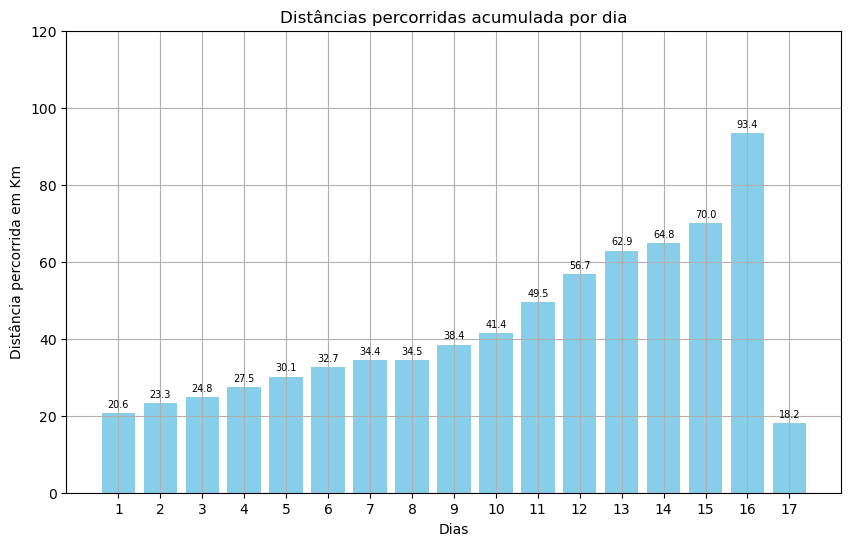

In [ ]:
distancias = all_paths_length
# Agrupar as distâncias a cada 4 registros para calcular a distância diária
distancias_diarias = [sum(distancias[i:i + 10]) for i in range(0, len(distancias), 10)]
#distancias_diarias = [sum(distancias[i:i + 8]) for i in range(0, len(distancias), 8)]  # para 2 agentes por posto!!!

# Criar lista de dias
dias = list(range(1, len(distancias_diarias) + 1))
#dias = list(range(1, len(distancias_diarias) + 1)) # para 2 agentes por posto!!!

# Plotar gráfico de barras verticais
plt.figure(figsize=(10, 6))
plt.bar(dias, distancias_diarias, color='skyblue')
#plt.ylim(0,70) ### # para 2 agentes por posto!!!
plt.ylim(0, 120)
plt.grid(True)

# Adicionar rótulos e título
plt.xlabel('Dias')
plt.ylabel('Distância percorrida em Km')
plt.title('Distâncias percorridas acumulada por dia')

# Adicionar rótulos nas barras com as quantidades de distâncias
for i, v in enumerate(distancias_diarias):
    plt.text(i + 1, v + 1, str(round(v,1)), ha='center', va='bottom', fontsize=7)
# Ajustar os rótulos do eixo x
plt.xticks(dias, labels=[str(dia) for dia in dias])
plt.savefig('Quilometragem_teste_Bike_formiga_Sul.png')
# Mostrar gráfico
plt.show()


#### 4.6) gráfico de porcentagem de cobertura por dia por custo:

In [ ]:
# Supondo que Modulo.Region_data já está definido
points = Modulo.Region_data(postos_data, publico_data, n=0, regiao=regiao)

num_pontos_inicial = len(points)-1
len_selec = 0

# Listas para armazenar os dados para o gráfico de barras
porcentagens_cobertas = []
custos = []
dias = []

# Constante de custo por agente
custo_por_agente = 289.63
custo_por_posto = custo_por_agente #* 2 ### *2 p/ dois agentes

# Soma para porcentagem final
soma_porcentagem_restante = 0
num_iteracoes_adicionadas = 0

for i in range(len(visited_coord)):
    amostras_adicionadas = len(visited_coord[i]) - 1
    len_selec += amostras_adicionadas
    num_pontos_restantes = num_pontos_inicial - len_selec

    # Calcula porcentagem de cobertura:
    porcentagem_coberta = 100 * len_selec / num_pontos_inicial
    porcentagem_restante = 100 - porcentagem_coberta

    # Calcula o custo total até a iteração atual
    custo_total = (i + 1) * custo_por_posto

    # Armazena os dados para o gráfico de barras a cada 4 iterações
    if (i + 1) % 10 == 0:
    #if (i + 1) % 8 == 0: ##Para 2 agentes por posto!!!
        porcentagens_cobertas.append(porcentagem_coberta)
        custos.append(custo_total)
        dias.append((i + 1) // 10)
        #dias.append((i + 1) // 8) ###Para 2 agentes por posto!!!
        soma_porcentagem_restante = 0
        num_iteracoes_adicionadas = 0
    else:
        # Acumula a porcentagem restante para somar no final, se necessário
        soma_porcentagem_restante += porcentagem_restante
        num_iteracoes_adicionadas += 1

# Se houver iterações restantes que não foram incluídas na última barra
if num_iteracoes_adicionadas > 0:
    porcentagem_coberta = 100 * len_selec / num_pontos_inicial
    porcentagens_cobertas.append(porcentagem_coberta)
    custos.append(custo_total)
    dias.append((len(visited_coord) + 9) // 10)
    #dias.append((len(seq_coord) + 1) // 7) ### Para 2 agentes por posto!!!

# Cria uma figura para o gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Cria o gráfico de barras para porcentagem coberta e restante
width = 0.8  # Largura das barras
x = np.arange(len(dias))  # Posições das barras no eixo x

# Barras para porcentagem coberta
bars_cobertas = ax1.bar(x - width+0.8, porcentagens_cobertas, width, label='Coberta', color='skyblue')
# Adiciona rótulos e título
ax1.set_xlabel('Dias')
ax1.set_ylabel('Porcentagem (%)')
ax1.set_title(f'Cobertura acumulada com custo total de {int(custo_total)} reais', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(dias)

ax1.set_ylim(0, 105)  # Define o valor fixo do eixo y de 0 até 100
ax1.grid(axis='x')
plt.grid(True)

# Adiciona rótulos com as porcentagens acima das barras
for bar in bars_cobertas:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# Cria um segundo eixo y compartilhado com o primeiro eixo x
ax2 = ax1.twinx()

# Adiciona o gráfico de linha para os custos
ax2.plot(x, custos, color='red', marker='o', label='Custo')
ax2.set_ylabel('Custo (R$)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.label.set_color('red')  # Define a cor do rótulo do eixo y secundário como vermelho
#ax2.spines['right'].set_color('red')  # Define a cor da borda direita (eixo y secundário) como vermelho

plt.savefig('Porcentagem_dia_custo_Bike_Formigas_Sul.png')
plt.show()



NameError: name 'Modulo' is not defined

### Cronograma:

### Próximas etapas para Abril:

#### 1) Criar uma função para dividir o banco de dados por regiões; [FEITO]

#### 2) Adaptar a função de cálculo de distância no Otimizador; [FEITO]

#### 3) Estratégia para armazenar o caminho para plotar o mapa posteriormente; [FEITO]

#### 4) Adaptar a geração do mapa Folium para o caminho feito pelo Otimizador; [FEITO]

#### 5) Implementar o cálculo de tempo diário dos agentes, parando o algoritmo no momento emq ue se alcança a jornada diária; [FEITO]

#### 6) Estratégia para começar as iterações por alguma unidade de atendimento (onde o agente de saúde saí); [FEITO] - [Obs: essa parte é necessária para fins de código, porém é válido lembrar que, o melhor caminho é independente do ponto de partida]

#### 7) Verificar o funcionamento da função "expediente_agente", se está fazendo certo; [FEITO]

#### 8) Adaptar a função stack para uma subregião inteira (m = len(data when regiao == Sudeste); [FEITO]

#### 9) Testar o incremento do raio. [FEITO]

### Próximas etapas para Maio:

#### 1) Unir as funções de "ant_colony_optimization" e "best_way", isso para melhorar a funcionalidade do futuro loop; [FEITO]

#### 2) Gerar um .txt como um relatório de: mudança de raio, melhor caminho e etc... Para fins de registro! [FEITO]

#### 3) Armazenar cada "best_path" após cada loop; [FEITO]

#### 4) Analizar possíveis variáveis que serão necessárias para as etapas finais e gerá-las no Otimizador; [FEITO]

#### 5) Usar o "best_path" para uma próxima rodada, para não passar por pontos já visitados; [FEITO]

##### 5.1) Uma abordagem: montar um "new_stack_data" retirando os pontos de stack_data[best_path] que entra num novo loop (2° dia do agente) no otmizador. [FEITO]

##### 5.2) Calculo do tempo total, verificar as saídas; [FEITO]

##### 5.3) Adaptar as novas funções no Modulo.py; [FEITO]

##### 5.4) O que acontece se o loop percorre todos os pontos? Usar o "break"? [FEITO]

#### 6) Automatizar a geração dos Mapas e salvar em cada iteração, para mostrar a evolução da cubertura; [FEITO]

#### 7) Retirada informações desnecessárias para otimizar a execução do script: [FEITO]

###### 7.1) retirada dos prints e variáveis densecessárias; [FEITO]
###### 7.2) separação das funções "ant_colony_optimization" e "best_way"; [FEITO]
###### 7.3) retirada do relatório .txt (gera muitos arquivos no Super loop, poluindo as informações) [FEITO]

#### Extra: Tentar implementar o Cython para otimizar os cálculos (muito tempo para gerar o resultado devido a quantidade de amostra

### Próximas etapas para Junho:

#### 1) Desenvolver gráficos de evolução de porcentagem de cobertura vacinal; [FEITO]

#### 2) Salvar a variável "seq_coord" para ser usado nos próximos itens; [NÃO É NECESSÁRIO]

#### 3) Discução sobre os gráficos finais; [FEITO]

#### 4) Estudo comparativo entre quantidade de agentes, custo e tempo de cobertura; [FEITO]

##### 4.1) gráfico de porcentagem por dia; [FEITO]
##### 4.2) gráfico de quilometragem por dia; [FEITO]
##### 4.3) custo dos agentes. [FEITO]

#### 5) Testes para diferentes Hiperparâmetros; [PARCIALMENTE FEITO]

#### 6) Plotar um mapa com cada região em uma cor. [FEITO]


### END